### Section 2

2.1 Import Libraries

In [29]:
# Data wrangling
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
# Off FutureWarnings
import warnings 
warnings.filterwarnings('ignore')
#Resampling
from imblearn.over_sampling import SMOTENC 
from sklearn.utils import class_weight
#Dimension Reduction
from sklearn.decomposition import PCA
# Preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# Models Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
# Model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
# Save model
import pickle

2.2 Upload Dataframe

In [30]:
## Upload df
df = pd.read_csv('data.csv') 
pd.options.mode.chained_assignment = None
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


2.3 Check for duplicates

In [31]:
# Verify if the data has duplicate values 
data_duplicates = df.duplicated().sum() 
print("Total duplicated values: ", data_duplicates)


Total duplicated values:  0


2.4 Check for missing values

In [32]:
# Verify if the data has missing values 
data_null = df.isnull().sum().sum() 
print("Total missing values: ", data_null)


Total missing values:  0


2.5 Verify data structure

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

2.6 Describe Numeric Features

In [34]:
## Numeric features analysis 
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


2.7 Verify "Target" variable distribution

In [35]:
# Cannot do 2.7 because there is no target variable

2.8 Verify "Failure" distribution

In [36]:
## Verify the proportion of column "Failure_type" 
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

### Section 3

3.1 Rename columns

In [37]:
rename_columns = { 'UDI':'ID',
'Air temperature [K]': 'Air_temperature',
'Process temperature [K]' : 'Process_temperature', 
'Rotational speed [rpm]' : 'Rotational_speed', 
'Torque [Nm]' : 'Torque',
'Tool wear [min]' : 'Tool_wear',
'Machine failure' : 'Machine_failure'
}
df.rename(rename_columns, axis = 1, inplace = True)

3.2 Identify redundant rows

In [38]:
PREDICTION_FEATURES = ['TWF', 'HDF', 'PWF', 'OSF','RNF']
sum_features = df[PREDICTION_FEATURES].sum(axis=1)
count_more_than_one = (sum_features > 1).sum()
count_more_than_one

24

In [39]:
mask = sum_features <= 1
df = df[mask]

In [40]:
## There are 24 rows where more than one failure is present.. I say we remove thses

In [41]:
# Analysing redundance value, count failures on "Target" column
# count_failures = (df['Target'] == 1).sum()
# print('Number of failures:', count_failures)
# # Sum of occurrences of 'Failure_type' other than 'No Failure'
# sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Target'] == 1), 'Failure_type'].count()
# print('Sum of failures different of "No Failure":', sum_failures)

## Have to modify this


3.3 Remove redundant rows

In [42]:
# Filter the rows with has 1 in the column "Target" and 'No Failure' in the column 'Failure_type' rows_to_remove = df[(df['Target'] == 1) & (df['Failure_type'] == 'No Failure')]
# Remove this filtered row in the main df
# df.drop(rows_to_remove.index, inplace=True)

# Have to modify this

3.4 Remove unecessary columns

In [43]:
df.columns

Index(['ID', 'Product ID', 'Type', 'Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear', 'Machine_failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [44]:
#Removing unnecessary columnds
drop_columns = ["ID", "Product ID"] 
df.drop(drop_columns, axis = 1, inplace = True)

3.5 Remove Random Failures

3.6 Rename "type"

In [45]:
rename_type = {
    'L':'Low',
    'M':'Medium',
    'H':'High'
}
df['Type'].replace(rename_type, inplace = True)

3.7 Plot the "type" distribtution

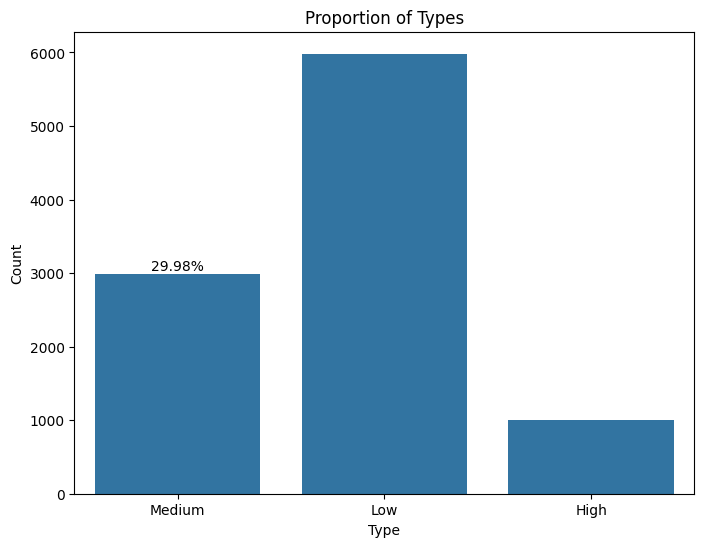

In [46]:
# Count types
tipo_contagem = df['Type'].value_counts()
# Show graphic
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Type') 
plt.title('Proportion of Types') 
plt.xlabel('Type') 
plt.ylabel('Count')
# Add as percentages as labels 
total = len(df['Type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
    plt.show()

3.8 Plot Failure Type distribution

In [47]:
df['Failure_type'] = 'NF'
df.loc[(df['Machine_failure'] == 1) & (sum_features > 0), 'Failure_type'] = df[PREDICTION_FEATURES].idxmax(axis=1)
df.head()

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF,Failure_type
0,Medium,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,NF
1,Low,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,NF
2,Low,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,NF
3,Low,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,NF
4,Low,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,NF


3.9 Plot histogram

In [48]:
df.columns

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF', 'Failure_type'],
      dtype='object')

In [49]:
NUMERIC_FEATURES = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
CATEGORIC_FEATURES = ['Type']

3.12 Scale and encode

In [50]:
# Create preprocessor ColumnTransformer to do OneHotEncoder for CATEGORIC_FEATURES and StandardScaler() for NUMERIC_FEATURES
# Define the pipelines for numeric and categorical transformations
num_pipeline = Pipeline([
    ('num_features', StandardScaler()) 
    ])
cat_pipeline = Pipeline([ 
    ('cat_features', OneHotEncoder())
    ])
# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_pipeline, NUMERIC_FEATURES),
    ('cat_trans', cat_pipeline, CATEGORIC_FEATURES) ])
# Fit and transform the data
df_transformed = preprocessor.fit_transform(df)
# Converting the transformed data back to a dataframe for easier visualization
# The transformed data will have new column names, especially for the one hot encoded categories 
encoded_feature_names = preprocessor.named_transformers_['cat_trans'].get_feature_names_out(CATEGORIC_FEATURES) 
new_column_names = list(NUMERIC_FEATURES) + list(encoded_feature_names)
df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)
df_transformed.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_High,Type_Low,Type_Medium
0,-0.951551,-0.946692,0.065483,0.289789,-1.695147,0.0,0.0,1.0
1,-0.901538,-0.879314,-0.732576,0.643119,-1.647949,0.0,1.0,0.0
2,-0.951551,-1.014071,-0.230301,0.956069,-1.616484,0.0,1.0,0.0
3,-0.901538,-0.946692,-0.593055,-0.043351,-1.585019,0.0,1.0,0.0
4,-0.901538,-0.879314,-0.732576,0.007125,-1.553553,0.0,1.0,0.0


3.13 PCA Analysis

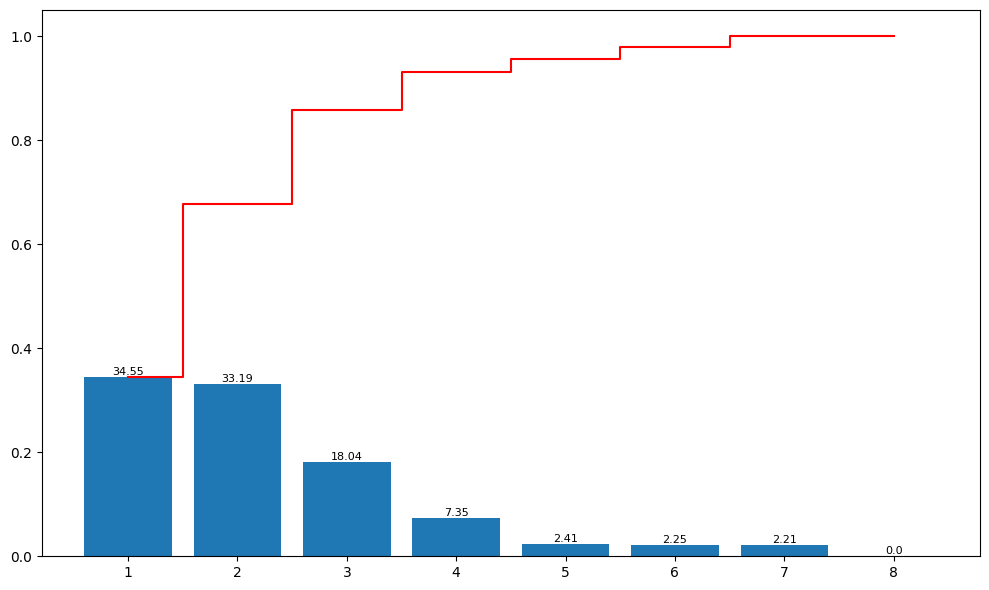

In [51]:
# Define PCA function
pca = PCA()
pca.fit(df_transformed) 

# PCA variance explained
exp_var = pca.explained_variance_ratio_ 
cum_exp_var = exp_var.cumsum()

# Number of components 
n_pca_components = len(exp_var)

# Create the graphic
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, n_pca_components + 1), exp_var, align='center', label='Individual explained variance') 
plt.step(range(1, n_pca_components + 1), cum_exp_var, where='mid', label='Cumulative explained variance', color='red')

# Add labels in each bar 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), va='bottom', ha='center', fontsize=8)

# Adjust others elements of the graphic plt.ylabel('Explained variance percentage') plt.xlabel('Principal component index') plt.xticks(ticks=list(range(1, n_pca_components + 1))) plt.title('PCA Explained Variance') plt.legend(loc='best')
plt.tight_layout() 
plt.show()

In [52]:
#Consider using 5 componenets.. above 95% is good
cum_exp_var

array([0.34548569, 0.6774101 , 0.85783457, 0.93134567, 0.95541723,
       0.97792959, 1.        , 1.        ])

3.14 Understanding PCA components

### Section 4

In [53]:
from sklearn.metrics import f1_score 
def get_metrics(y_true, y_pred):
    # Calculating F1 scores for each class
    f1_scores_per_class = f1_score(y_true, y_pred, average=None)
    dict_metrics = {
    'Accuracy': accuracy_score(y_true, y_pred),
    'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
    'Macro Recall': recall_score(y_true, y_pred, average='macro'), 'Macro Precision': precision_score(y_true, y_pred, average='macro'), 'Macro F1': f1_score(y_true, y_pred, average='macro'),
    'F1 Scores per Class': f1_scores_per_class
    }
    return dict_metrics

4.2 Train and test

In [54]:
df_model = df.copy()
X = df_model[NUMERIC_FEATURES + CATEGORIC_FEATURES]
y = df_model['Failure_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

4.3 Create model with PCA and class weight

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.compose import ColumnTransformer

# Define the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))  # Assuming 5 classes
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), NUMERIC_FEATURES),
    ('cat', OneHotEncoder(handle_unknown='ignore'), CATEGORIC_FEATURES)
])

# Define the pipeline with PCA
pip_model_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=4)),
    ('model', KerasClassifier(model=create_model, model__input_dim=4, epochs=50, batch_size=32, verbose=1))
])

# Compute sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

# Fit the pipeline
pip_model_pca.fit(X_train, y_train, model__sample_weight=weights)

# Generate predictions
y_pred = pip_model_pca.predict(X_test)

# Evaluate metrics
metrics = get_metrics(y_test, y_pred)
print(metrics)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4719 - loss: 1.8020
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2197 - loss: 1.4473
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.2457 - loss: 1.2317
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2722 - loss: 1.2153
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.3587 - loss: 1.1303
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.3463 - loss: 1.0573
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4733 - loss: 1.0030
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4409 - loss: 0.8952
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4832 - loss: 0.9820
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.4698 - loss: 0.8232
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5322 - loss: 0.9339
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 

Step 4.4 Create Neural Network Model without PCA and with Class Weights

In [69]:
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Get the input dimension for the neural network
input_dim = X_train_transformed.shape[1]
# Define the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))  # Assuming 5 classes
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
# Define the pipeline without PCA
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KerasClassifier(model=create_model, model__input_dim=input_dim, epochs=50, batch_size=32, verbose=1))
])

# Compute sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

# Fit the pipeline
pip_model_no_pca.fit(X_train, y_train, model__sample_weight=weights)

# Generate predictions
y_pred = pip_model_no_pca.predict(X_test)

# Evaluate metrics
metrics = get_metrics(y_test, y_pred)
print(metrics)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3404 - loss: 1.7653
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3446 - loss: 1.3577
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2995 - loss: 1.2588
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3663 - loss: 1.0139
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4194 - loss: 0.9096
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4679 - loss: 0.9270
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5319 - loss: 0.7379
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5068 - loss: 0.7809
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5654 - loss: 0.6650
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4920 - loss: 0.6785
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5185 - loss: 0.6685
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Step 4.5: Create Neural Network Model without PCA and with SMOTE-NC


In [72]:
# Assuming X_train is a DataFrame
categorical_features_indices = [X_train.columns.get_loc(col) for col in CATEGORIC_FEATURES]
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training data to get the correct input dimension
X_train_transformed = preprocessor.transform(X_train)
input_dim = X_train_transformed.shape[1]

# Define the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))  # Assuming 5 classes
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Creating the new pipeline with SMOTENC using ImbPipeline
pip_model_smotenc = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', SMOTENC(categorical_features=categorical_features_indices, random_state=42)),
    ('model', KerasClassifier(build_fn=create_model, input_dim=input_dim, epochs=50, batch_size=32, verbose=1))
])

# Fit the pipeline
pip_model_smotenc.fit(X_train, y_train)

# Generate predictions
y_pred = pip_model_smotenc.predict(X_test)

# Evaluate metrics
metrics = get_metrics(y_test, y_pred)
print(metrics)


Epoch 1/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6098 - loss: 0.9992
Epoch 2/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8904 - loss: 0.3425
Epoch 3/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9179 - loss: 0.2623
Epoch 4/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9345 - loss: 0.2137
Epoch 5/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9455 - loss: 0.1862
Epoch 6/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9448 - loss: 0.1811
Epoch 7/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9472 - loss: 0.1731
Epoch 8/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9550 - loss: 0.1471
Epoch 9/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9578 - loss: 0.1443
Epoch 10/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9569 - loss: 0.1429
Epoch 11/50
1209/1209 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9589 - loss: 0.1439
Epoch 12/50
1209/1209 ━━━━━━━━